In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf,pacf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import figure

In [ ]:
df= pd.read_csv('B+demand.csv')

In [ ]:
df.head()

,Date,demand
0,01.01.2019,3
1,02.01.2019,6
2,03.01.2019,2
3,04.01.2019,5
4,05.01.2019,4


Text(0, 0.5, 'Blood demand')

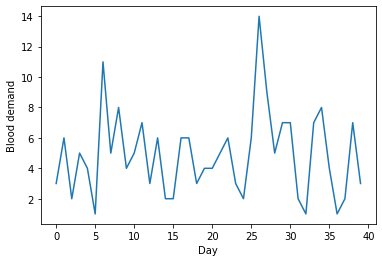

In [ ]:
plt.plot(df['demand'][0:40])
plt.xlabel("Day")
plt.ylabel("Blood demand")

In [ ]:
Y_test=df['demand'][32:40]

C:\Users\Mypc\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


<BarContainer object of 10 artists>

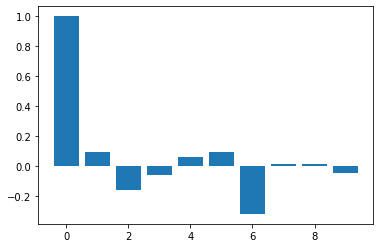

In [ ]:
acf_vals=acf(df['demand'][0:40])
num_lags=10
plt.bar(range(num_lags),acf_vals[:num_lags])

In [ ]:
rolling = df['demand'][0:40].rolling(window=6)
ypred_MA = rolling.mean()
print(ypred_MA.head(10))

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5    3.500000
6    4.833333
7    4.666667
8    5.666667
9    5.500000
Name: demand, dtype: float64


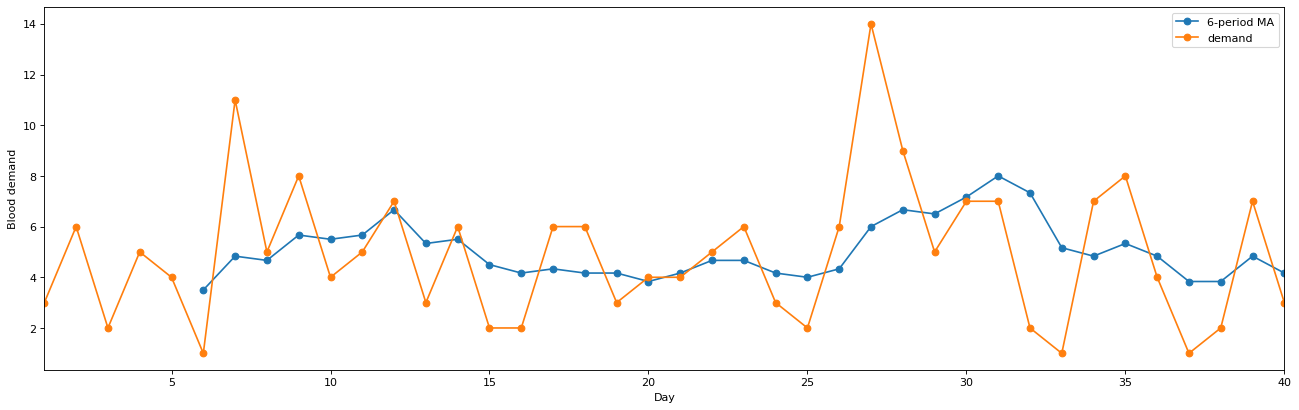

In [ ]:
figure(figsize=(20, 6), dpi=80)
x_range = range(1,41)
plt.plot(x_range,ypred_MA,marker = 'o',label="6-period MA")
plt.plot(x_range,df['demand'][0:40],label="demand",marker = 'o')
plt.xlim([1, 40])
plt.xlabel("Day")
plt.ylabel("Blood demand")
plt.legend()
plt.show()

In [ ]:
mse_MA=mean_squared_error(Y_test, ypred_MA[32:40])

In [ ]:
ypred_MA

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5     3.500000
6     4.833333
7     4.666667
8     5.666667
9     5.500000
10    5.666667
11    6.666667
12    5.333333
13    5.500000
14    4.500000
15    4.166667
16    4.333333
17    4.166667
18    4.166667
19    3.833333
20    4.166667
21    4.666667
22    4.666667
23    4.166667
24    4.000000
25    4.333333
26    6.000000
27    6.666667
28    6.500000
29    7.166667
30    8.000000
31    7.333333
32    5.166667
33    4.833333
34    5.333333
35    4.833333
36    3.833333
37    3.833333
38    4.833333
39    4.166667
Name: demand, dtype: float64

In [ ]:
mse_MA**0.5

2.431706076902479

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [ ]:
error_es=np.zeros(9)
ax=np.zeros(9)
for x in range(1,10,1):
    ins = SimpleExpSmoothing(df['demand'][0:40]).fit(smoothing_level=x/10,optimized=False)
    ins_cast = ins.forecast(8).rename('alpha=x/10')
    pred_es=ins.fittedvalues
    ax[x-1]=x/10
    error_es[x-1]=mean_squared_error(Y_test, pred_es[32:40])

No handles with labels found to put in legend.


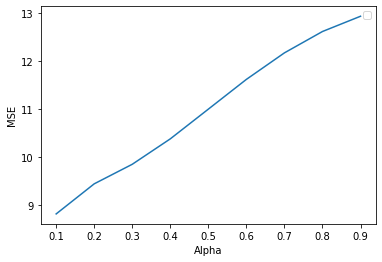

In [ ]:
plt.plot(ax,error_es)
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()

In [ ]:
ins = SimpleExpSmoothing(df['demand'][0:40]).fit(smoothing_level=0.1,optimized=False)
ins_cast = ins.forecast(8).rename('alpha=0.1')
ypred_es=pred_es=ins.fittedvalues
mse_es=mean_squared_error(Y_test, pred_es[32:40])

In [ ]:
mse_es**0.5

2.968344683697844

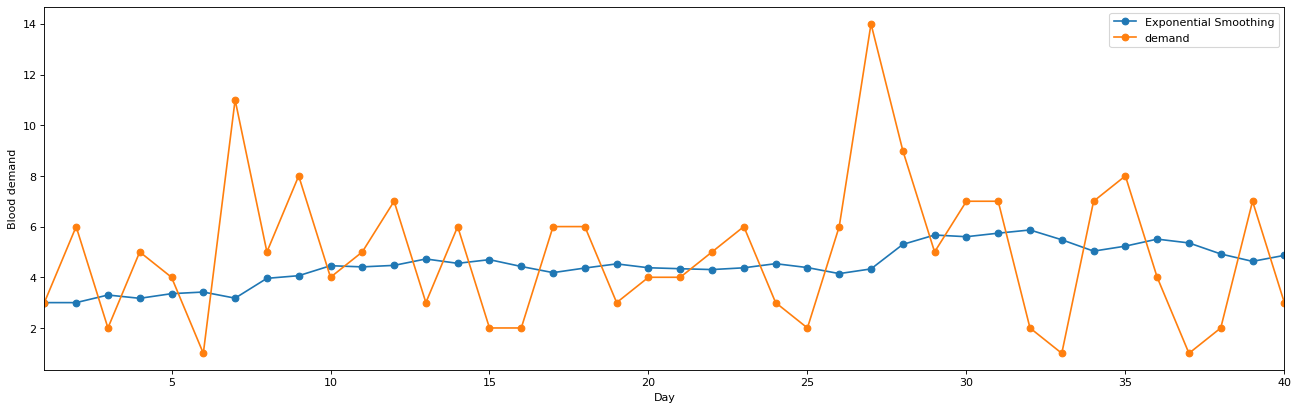

In [ ]:
figure(figsize=(20, 6), dpi=80)
x_range = range(1,41)
plt.plot(x_range,ypred_es,marker = 'o',label="Exponential Smoothing")
plt.plot(x_range,df['demand'][0:40],label="demand",marker = 'o')
plt.xlim([1, 40])
plt.xlabel("Day")
plt.ylabel("Blood demand")
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['demand'][0:40])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.741076
p-value: 0.000070


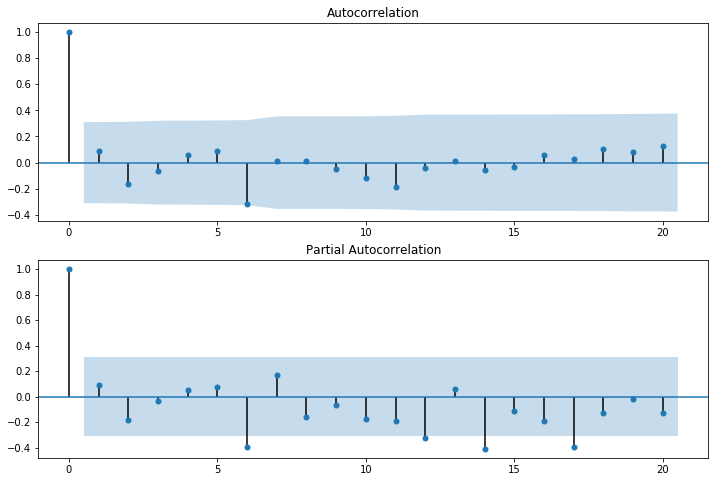

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['demand'][0:40].dropna(),lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['demand'][0:40].dropna(),lags=20,ax=ax2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['demand'][0:40],order=(1,0,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 demand   No. Observations:                   40
Model:                     ARMA(1, 1)   Log Likelihood                 -95.677
Method:                       css-mle   S.D. of innovations              2.627
Date:                Thu, 18 Nov 2021   AIC                            199.354
Time:                        13:19:36   BIC                            206.110
Sample:                             0   HQIC                           201.797
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.8856      0.469     10.426      0.000       3.967       5.804
ar.L1.demand    -0.7113      0.159     -4.460      0.000      -1.024      -0.399
ma.L1.demand     0.9333      0.098      9.571      0.000       0.742       1.124
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4058           +0.0000j            1.4058            0.5000
MA.1           -1.0715           +0.0000j            1.0715            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
ypred=model_fit.predict(dynamic=False)

In [ ]:
ypred

0     4.885625
1     4.626674
2     5.280826
3     4.059819
4     5.638195
5     4.050018
6     4.902161
7     6.059816
8     3.839875
9     6.470157
10    3.252223
11    6.409976
12    3.924879
13    5.373720
14    4.671617
15    4.466302
16    4.653587
17    5.341453
18    4.704131
19    4.644149
20    4.916933
21    4.662935
22    5.117857
23    4.913984
24    4.444858
25    4.661191
26    5.340202
27    6.471860
28    4.315254
29    5.442588
30    4.833648
31    5.401660
32    3.765948
33    5.069869
34    5.181943
35    5.299031
36    4.303747
37    4.567385
38    4.542916
39    5.674141
dtype: float64

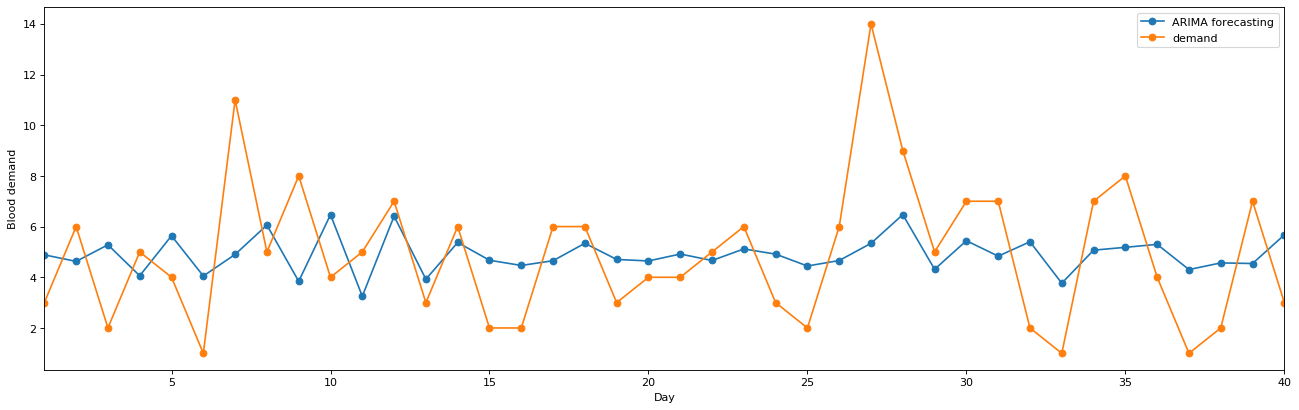

In [ ]:
figure(figsize=(20, 6), dpi=80)
x_range = range(1,41)
plt.plot(x_range,ypred,marker = 'o',label="ARIMA forecasting")
plt.plot(x_range,df['demand'][0:40],label="demand",marker = 'o')
plt.xlim([1, 40])
plt.xlabel("Day")
plt.ylabel("Blood demand")
plt.legend()
plt.show()

In [ ]:
error_arima=mean_squared_error(Y_test, ypred[32:40])
error_arima**0.5

2.542127553819709

In [ ]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)

In [ ]:
demandlist=df['demand'][0:40].tolist()

In [ ]:
demandarr=df['demand'][0:40].to_numpy()

In [ ]:
n_steps = 3
# split into samples
X, y = split_sequence(demandlist, n_steps)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[3 6 2] 5
[6 2 5] 4
[2 5 4] 1
[5 4 1] 11
[ 4  1 11] 5
[ 1 11  5] 8
[11  5  8] 4
[5 8 4] 5
[8 4 5] 7
[4 5 7] 3
[5 7 3] 6
[7 3 6] 2
[3 6 2] 2
[6 2 2] 6
[2 2 6] 6
[2 6 6] 3
[6 6 3] 4
[6 3 4] 4
[3 4 4] 5
[4 4 5] 6
[4 5 6] 3
[5 6 3] 2
[6 3 2] 6
[3 2 6] 14
[ 2  6 14] 9
[ 6 14  9] 5
[14  9  5] 7
[9 5 7] 7
[5 7 7] 2
[7 7 2] 1
[7 2 1] 7
[2 1 7] 8
[1 7 8] 4
[7 8 4] 1
[8 4 1] 2
[4 1 2] 7
[1 2 7] 3


In [ ]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X_train=X[0:29]
X_test=X[29:37]
Y_train=y[0:29]
Y_test=y[29:37]

In [ ]:
X.shape

(37, 3, 1)

In [ ]:
model = Sequential()
model.add(LSTM(40, activation='relu',input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X_train, Y_train, epochs=700, verbose=0)

In [ ]:
Y_pred = model.predict(X_test, verbose=0)

In [ ]:
Y_pred

array([[ 5.2932253],
       [ 4.4440117],
       [ 7.6242437],
       [ 4.159258 ],
       [ 4.622651 ],
       [ 5.790998 ],
       [13.129625 ],
       [ 4.871252 ]], dtype=float32)

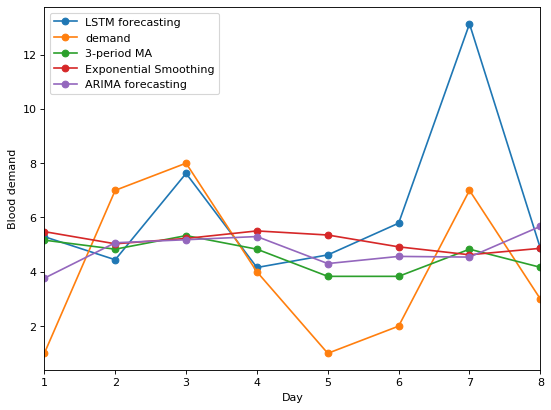

In [ ]:
figure(figsize=(8, 6), dpi=80)
x_range = range(1,9)
plt.plot(x_range,Y_pred,marker = 'o',label="LSTM forecasting")
plt.plot(x_range,Y_test,label="demand",marker = 'o')
plt.plot(x_range,ypred_MA[32:40],marker = 'o',label="3-period MA")
plt.plot(x_range,ypred_es[32:40],marker = 'o',label="Exponential Smoothing")
plt.plot(x_range,ypred[32:40],marker = 'o',label="ARIMA forecasting")
plt.xlim([1, 8])
plt.xlabel("Day")
plt.ylabel("Blood demand")
plt.legend()
plt.show()

In [ ]:
error=mean_squared_error(Y_test, Y_pred)
error**0.5

3.4223634561071252